<a href="https://colab.research.google.com/github/linyu3294/cs6220-data-minning-hw/blob/main/cs6220_hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# HW6

Topic Models, Summarization, Elastic Search
Make sure you check the syllabus for the due date. Please use the notations adopted in class, even if the problem is stated in the book using a different notation.

We are not looking for very long answers (if you find yourself writing more than one or two pages of typed text per problem, you are probably on the wrong track). Try to be concise; also keep in mind that good ideas and explanations matter more than exact details.

Submit all code files Dropbox (create folder HW1 or similar name). Results can be pdf or txt files, including plots/tabels if any.
"Paper" exercises: submit using Dropbox as pdf, either typed or scanned handwritten.


**Load 20News Group**

**Load  DUC 2001 summarization dataset**

---
```
You will need to install ElasticSearch and corresponding plugins in order to manipulate and visualize text
server: https://www.elastic.co
```
```
visualization, control: https://www.elastic.co/downloads/kibana
```
```
API for Java: https://www.elastic.co/guide/en/elasticsearch/client/java-api/6.2/index.html
```

```

API for Python: https://elasticsearch-py.readthedocs.io/en/master/
```
```
API for Perl: http://search.cpan.org/dist/Search-Elasticsearch/lib/Search/Elasticsearch.pm
```


---
## **PROBLEM 1: Elastic Search**

PROBLEM 1: Text Indexing

Index each dataset separetely in Elastic Search (one index for each dataset). First set up the indexes/types/fields in Kibana, then use an API to send all docs to the index. At the minimum you will need two fields: "doc_id", and "doc_text"; you can add other fields. For DUC dataset add a field "gold_summary".






```

https://github.com/linyu3294/elastic-search-indexing-script



kibana - http://localhost:5601/app/home#/

elasticsearch - http://localhost:9200

```

---
##**PROBLEM 2: Topic Models**##

Obtain Topic Models (K=10, 20, 50) for both datasets by running LDA and NMF methods; you can call libraries for both methhods and dont have to use the ES index as source. For both LDA and NMF: print out for each topic the top 20 words (with probabilities)





---
### **Section A : LDA Topic Models**

Obtain Topic Models (K=10, 20, 50) for both 20ng and DUC by running LDA ; Print out for each topic the top 20 words (with probabilities)

>The rest of of topic exercises and results are required only for the LDA topics:
- 20NG: how well the topics allign with the 20NG label classes? This is not asking for a measurement, but rather for a visual inspection to determine what topics match well with what classes. Does this cnage if one increases the topics from 20 to 50?
- ES: Add a type or inew index "topic" with fields "topic_id" and "top_words" to store for each topic the top 10 words with associated probabilities.
- ES: Add a field for documents "doc_topics" and update the index to store for each document the most important topics (up to 5) and doc-topic probabilities


Running a LDA model using **Gensim** library on simplified test data with 2 sentences

In [ ]:
from gensim import corpora, models

# ['Baby','had','an','accident'] = first document
# ['Mom','was','watching','the','baby']  = second document
dataset = [['Baby','had','an','accident'], ['Mom','was','watching','the','baby','when','the','baby','fell']]
print (dataset)
dictionary_LDA = corpora.Dictionary(dataset)
print (dictionary_LDA)
# creates a bag of words representation
corpus_train = [dictionary_LDA.doc2bow(words) for words in dataset]
print(corpus_train)


num_topics = 5
lda_model = models.LdaModel(corpus_train, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

# print topics and corresponding probablities
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=3):
    print(str(i)+": "+ topic)
    print()

[['Baby', 'had', 'an', 'accident'], ['Mom', 'was', 'watching', 'the', 'baby', 'when', 'the', 'baby', 'fell']]
Dictionary(11 unique tokens: ['Baby', 'accident', 'an', 'had', 'Mom']...)
[[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 2), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1)]]
0: 0.091*"was" + 0.091*"watching" + 0.091*"fell"

1: 0.091*"was" + 0.091*"watching" + 0.091*"fell"

2: 0.091*"was" + 0.091*"watching" + 0.091*"fell"

3: 0.246*"had" + 0.246*"an" + 0.246*"accident"

4: 0.221*"baby" + 0.221*"the" + 0.111*"fell"



Using **Gensim LDA** to run DUC. **THIS IS FITTING TOPIC MODEL FOR EACH DOCUMENT.**

In [ ]:
from gensim import corpora, models
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import os
import re

dataset_path = '/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/DUC2001/dataset/'
nltk.download('stopwords')


def map_duc_data (dataset_path) -> dict:
  list_of_files = os.listdir(dataset_path)
  doc_words_dict = {}
  for file_name in list_of_files:
    file_path = dataset_path + file_name
    with open(file_path) as fp:
      soup = BeautifulSoup(fp, 'html.parser')
      try:
        doc_id = soup.find('doc').find('docno').getText().strip()
        doc_text= soup.find('doc').find('text').getText().strip()
        doc_text = doc_text.lower().replace('\n','')
        sentences_list = []
        for sentence in doc_text.split('\.'):
          sent_text = re.sub('[^a-zA-Z0-9 \n\.]', '', sentence)
          words_list = sent_text.split(' ')   
          remove_list = stopwords.words('english')
          remove_list.extend([''])
          words_list = [i for i in words_list if i not in remove_list]
          sentences_list.append(words_list)
        doc_words_dict [doc_id] = sentences_list
      except Exception:
        print('unable to parse doc : ', file_name)
  return doc_words_dict
  


def process_duc_data (dataset) :
  dataset = dataset
  # print (dataset[:1])
  dictionary_LDA = corpora.Dictionary(dataset)
  # print (dictionary_LDA)
  # creates a bag of words representation
  corpus_train = [dictionary_LDA.doc2bow(words) for words in dataset]
  return corpus_train, dictionary_LDA



def train(corpus_train, dictionary_LDA, num_topics=20) :
  lda_model = models.LdaModel(corpus_train, num_topics=num_topics, \
                                    id2word=dictionary_LDA, \
                                    passes=1, alpha=[0.01]*num_topics, \
                                    eta=[0.01]*len(dictionary_LDA.keys()))
  return lda_model

print('\n\n\n')
doc_dict = map_duc_data(dataset_path)
break_counter = 0;
num_topics = 1

for key, val in doc_dict.items():
  if break_counter == 5: break;
  print (key , '\n')
  sentences_list = val
  corpus_train, dictionary_LDA= process_duc_data(sentences_list)
  lda_model = train(corpus_train, dictionary_LDA, num_topics)

  # print topics and corresponding probablities
  for topic in lda_model.show_topics(formatted=False, num_topics=num_topics, num_words=20):
      print(topic)
  print('\n\n')
  break_counter += 1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




FT911-5176 

(0, [('poor', 0.01629485), ('government', 0.01629485), ('debt', 0.01629485), ('poorest', 0.012231296), ('western', 0.012231296), ('third', 0.012231296), ('know', 0.008167743), ('factors', 0.008167743), ('causes', 0.008167743), ('countries', 0.008167743), ('away', 0.008167743), ('interests', 0.008167743), ('skinner', 0.008167743), ('often', 0.008167743), ('world', 0.008167743), ('burden', 0.008167743), ('poverty', 0.008167743), ('asia', 0.008167743), ('interest.', 0.008167743), ('help', 0.008167743)])



SJMN91-06212161 

(0, [('diabetes', 0.06337483), ('said.', 0.02820567), ('hispanics', 0.02820567), ('programs', 0.021171836), ('percent', 0.021171836), ('people', 0.014138004), ('st.', 0.014138004), ('society', 0.014138004), ('mcnamarasaid.', 0.014138004), ('diet', 0.014138004), ('mcnamara', 0.014138004), ('management', 0.007104171), ('possibility', 0.0

### **Using sklearn LDA to run 20 newsgroup And duc data**

This part of the homework was done in pycharm as it required elastic api features.

https://github.com/linyu3294/elastic-search-indexing-script/blob/master/lda_client.py

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import numpy as np
from nltk.corpus import stopwords
import nltk

def fetch_data_20ng():
  ng_train = fetch_20newsgroups(subset='train',
                                        remove=('headers', 'footers', 'quotes')).data
  ng_test = fetch_20newsgroups(subset='test',
                                       remove=('headers', 'footers', 'quotes')).data
  ng_data = ng_train+ng_test
  return ng_data


nltk.download('stopwords')
ng_data_raw = fetch_data_20ng()

for i in range(len(ng_data_raw)):
    temp = ng_data_raw[i]
    words_list = temp.split(' ')
    remove_list = stopwords.words('english')
    remove_list.extend([''])
    words_list = [i for i in words_list if i not in remove_list]
    doc = ' '.join(words_list)
    ng_data_raw[i] = doc

vectorizer = TfidfVectorizer()

ng_data = csr_matrix(vectorizer.fit_transform(ng_data_raw))

model =LatentDirichletAllocation(n_components=20,
                                 max_iter=10,
                                 learning_method='online',
                                 learning_offset=1,
                                 random_state=0)
result = model.fit(ng_data)
topics = result.components_

feature_names = vectorizer.get_feature_names()
top_20_words_per_topic = []
for i in range(len(topics)):
  topic_indices = list(np.argsort(topics[i])[-20:])
  top_20 = []
  for index in topic_indices:
    word = feature_names[index]
    top_20.append(word)
  top_20_words_per_topic.append(top_20)
  print (top_20)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['controller', 'reactor', '10mb', '5mb', 'speedo', 'towers', 'cracked', 'fossil', '205', 'b30', 'catbyte', 'dtmedin', 'callback', 'ingr', 'steam', 'eprom', 'intergraph', 'esdi', 'cooling', 'cherry']
['hitter', 'ini', 'batting', 'scored', 'temp', 'default', 'cursor', 'expansion', 'purchased', 'print', 'hitting', 'terminal', 'braves', 'utility', 'microsoft', 'org', 'amiga', 'keyboard', 'printing', 'file']
['for', 'they', 'think', 'people', 'get', 'of', 'is', 'know', 'if', 'like', 'in', 'this', 'to', 'you', 'that', 'one', 'and', 'would', 'it', 'the']
['believing', 'equivalent', 'revelation', 'jew', 'liberal', 'bugs', 'sub', 'turning', 'spec', 'ridiculous', 'rider', 'followers', 'sgi', 'graphic', 'satan', 'interpretation', 'roger', 'dod', 'morality', 'controller']
['ufl', '68070', 'olvwm', 'pom', 's4', 'rx', 'sq', 'lb', 'thx', 'jacks', 'kg', 'kk', 'eps', 'vf', 'tt', 'balanced', 'g

### **Section B : NMF Topic Models**

> Obtain Topic Models (K=10, 20, 50) for both 20ng and DUC by running NMF method; print out for each topic the top 20 words (with probabilities)

In [ ]:
from sklearn import decomposition
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import numpy as np
from nltk.corpus import stopwords
import nltk

def fetch_data_20ng():
  ng_train = fetch_20newsgroups(subset='train',
                                        remove=('headers', 'footers', 'quotes')).data
  ng_test = fetch_20newsgroups(subset='test',
                                       remove=('headers', 'footers', 'quotes')).data
  ng_data = ng_train+ng_test
  return ng_data


nltk.download('stopwords')
ng_data_raw = fetch_data_20ng()

for i in range(len(ng_data_raw)):
    temp = ng_data_raw[i]
    words_list = temp.split(' ')
    remove_list = stopwords.words('english')
    remove_list.extend([''])
    words_list = [i for i in words_list if i not in remove_list]
    doc = ' '.join(words_list)
    ng_data_raw[i] = doc

vectorizer = TfidfVectorizer()

ng_data = csr_matrix(vectorizer.fit_transform(ng_data_raw))

model = decomposition.NMF(n_components=20, max_iter=100)
result = model.fit(ng_data)
topics = result.components_

feature_names = vectorizer.get_feature_names()
top_20_words_per_topic = []
for i in range(len(topics)):
  topic_indices = list(np.argsort(topics[i])[-20:])
  top_20 = []
  for index in topic_indices:
    word = feature_names[index]
    top_20.append(word)
  top_20_words_per_topic.append(top_20)
  print (top_20)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
18846
355
['us', 'see', 'there', 'of', 'right', 'but', 'so', 'say', 'not', 'we', 'is', 'to', 'this', 'what', 'they', 'one', 'and', 'think', 'that', 'people']
['need', 'appreciate', 'tell', 'hello', 'wondering', 'is', 'information', 'find', 'anybody', 'someone', 'can', 'appreciated', 'looking', 'info', 'could', 'any', 'help', 'hi', 'advance', 'thanks']
['belief', 'man', 'life', 'love', 'heaven', 'lord', 'church', 'him', 'us', 'his', 'christians', 'sin', 'christian', 'believe', 'faith', 'christ', 'bible', 'he', 'jesus', 'god']
['fans', 'nhl', 'teams', 'they', 'first', 'league', 'player', 'win', 'espn', 'players', 'play', 'season', 'baseball', 'last', 'hockey', 'year', 'games', 'team', 'he', 'game']
['tape', 'bus', 'external', 'rom', 'bios', 'meg', 'seagate', 'boot', 'system', 'mac', 'cd', 'hd', 'floppy', 'controller', 'drives', 'hard', 'disk', 'ide', 'scsi', 'drive']
['a

In [ ]:
from sklearn import decomposition
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import numpy as np
from nltk.corpus import stopwords
import nltk
from bs4 import BeautifulSoup
import os
import re


dataset_path = '/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/DUC2001/dataset/'
nltk.download('stopwords')

def fetch_duc_data (dataset_path) -> list:
  list_of_files = os.listdir(dataset_path)
  docs = []
  for file_name in list_of_files:
    file_path = dataset_path + file_name
    with open(file_path) as fp:
      soup = BeautifulSoup(fp, 'html.parser')
      doc_text= soup.find('doc').find('text').getText().strip()
      doc_text = doc_text.lower().replace('\n',' ')
    docs.append(doc_text)
    # print (doc_text)

  return docs

duc_data_raw = fetch_duc_data(dataset_path)
print ('number of docs : ' , len(duc_data_raw))
nltk.download('stopwords')


for i in range(len(duc_data_raw)):
    temp = duc_data_raw[i]
    words_list = temp.split(' ')
    remove_list = stopwords.words('english')
    remove_list.extend([''])
    words_list = [i for i in words_list if i not in remove_list]
    doc = ' '.join(words_list)
    duc_data_raw[i] = doc

vectorizer = TfidfVectorizer()

duc_data = csr_matrix(vectorizer.fit_transform(duc_data_raw))

model = decomposition.NMF(n_components=20, max_iter=100)
result = model.fit(duc_data)
topics = result.components_

feature_names = vectorizer.get_feature_names()
top_20_words_per_topic = []
for i in range(len(topics)):
  topic_indices = list(np.argsort(topics[i])[-20:])
  top_20 = []
  for index in topic_indices:
    word = feature_names[index]
    top_20.append(word)
  top_20_words_per_topic.append(top_20)
  print (top_20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
number of docs :  308
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['administration', 'dependency', 'spending', 'children', 'system', 'plan', 'would', 'mr', 'bill', 'programs', 'poverty', 'president', 'families', 'clinton', 'work', 'recipients', 'benefits', 'governors', 'reform', 'welfare']
['barrels', 'miles', 'vessel', 'crude', 'reef', 'prince', 'gallons', 'million', 'coast', 'guard', 'sound', 'ship', 'alaska', 'tanker', 'said', 'cleanup', 'valdez', 'spill', 'exxon', 'oil']
['weather', 'damage', 'miami', 'forecasters', 'center', 'season', 'gray', 'hugo', 'gilbert', 'said', 'florida', 'tropical', 'winds', 'atlantic', 'mph', 'storms', 'storm', 'sheets', 'hurricanes', 'hurricane']
['lightning', 'areas', 'wilderness', 'contained', 'california', 'rain', 'brush', 'drought', 'burned', 'service', 'blaz


---
## **PROBLEM 3: Extractive Summarization** ##

Implement the KL-Sum summarization method for each dataset. Follow the ideas in this paper ;
```
http://www.ccs.neu.edu/home/vip/teach/DMcourse/5_topicmodel_summ/notes_slides/N09-1041.pdf

```

you are allowed to use libraries for text cleaning, segmentation into sentences, etc. Run it twice :

> A) KL_summary based on words_PD; PD is a distribution proportional to counts of words in document

> B) LDA_summary based on LDA topics_PD on obtained in PB2. The only difference is that PD, while still a distribution over words, is computed using topic modeling

- ES: Add two new fields to the document type, "KL_summary" and "LDA_summary" to store the obtained summaries.

For DUC dataset evaluate KL_summaries and LDA_summaries against human gold summaries with ROUGE. ROUGE Perl package


```

ROUGE package - https://github.com/andersjo/pyrouge/tree/master/tools/ROUGE-1.5.5
```





---
### **Section A : KL Summary Sentence**

>  A) KL_summary based on words_PD; PD is a distribution proportional to counts of words in document

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

nltk.download('punkt')

def kl_summarize (doc_data, num_of_sentences):
  summaries = []
  for document, file_name in doc_data:
    vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
    document_model = vectorizer.fit_transform([document])
    summary = []
    picked_sentences = set()
    for _ in range(num_of_sentences):
      this_sentence = ''
      this_sentence_score = float('-inf')
      this_sentence_index = 0
      for sentence in nltk.sent_tokenize(document):
        # print('sampling sentence: ', sentence, '\n')
        if this_sentence_index in picked_sentences: continue
        new_sentences = list(map(lambda x:x[0], summary))
        new_sentences.append(sentence)
        kl_score = kl_similarity(document_model.T.toarray(),
                                 vectorizer.transform([' '.join(new_sentences)]).T.toarray())
        if kl_score > this_sentence_score:
          this_sentence_score = kl_score
          this_sentence = (sentence, this_sentence_index)
        this_sentence_index += 1
      if this_sentence != '':
        summary.append(this_sentence)
        picked_sentences.add(this_sentence[1])

    summary = sorted(summary, key = lambda x: x[1]) 
    summaries.append(' '.join(list(map(lambda x: x[0], summary))))
  return summaries
  


    

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


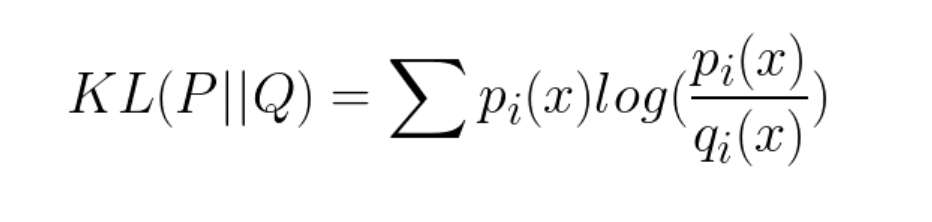

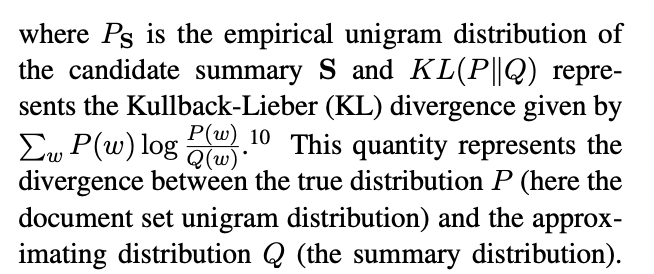

In [ ]:
import math
def kl_similarity(p, q) :
  kl =0 
  lambda_param = 0.1
  for i in range(p.shape[0]): 
    p_i = p[i]
    q_i = q[i]
    kl += p_i * math.log( (p_i + lambda_param) / (q_i + ( lambda_param * p_i.shape[0] ) ) )
  return kl

In [ ]:

from sklearn.datasets import fetch_20newsgroups 

def fetch_data_20ng():
  ng_train = fetch_20newsgroups(subset='train',
                                        remove=('headers', 'footers', 'quotes')).data
  ng_test = fetch_20newsgroups(subset='test',
                                       remove=('headers', 'footers', 'quotes')).data
  ng_data = ng_train+ng_test
  return ng_data



In [ ]:

ng_data = fetch_data_20ng()
# print (ng_data[466])

summaries = kl_summarize(zip(ng_data[480:483], ng_data[480:483]) , 20)
for i in summaries:
  print (i, '\n\n')
  



That's the entire point! Yes! 



Probably would not be fatal in an adult at that dose, but could kill
a child. Possibly cardiac arrhythmias. 




How do you figure that?? 




In [ ]:
from gensim import corpora, models
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import os
import re


dataset_path = '/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/DUC2001/dataset/'
nltk.download('stopwords')

def fetch_duc_data (dataset_path) -> list:
  list_of_files = os.listdir(dataset_path)
  docs = []
  for file_name in list_of_files:
    file_path = dataset_path + file_name
    with open(file_path) as fp:
      soup = BeautifulSoup(fp, 'html.parser')
      doc_text= soup.find('doc').find('text').getText().strip()
      doc_text = doc_text.lower().replace('\n',' ')
    docs.append(doc_text)
    # print (doc_text)

  return docs

duc_data = fetch_duc_data(dataset_path)
print ('number of docs : ' , len(duc_data))
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
number of docs :  308


In [ ]:

# print (ng_data[466])

summaries = kl_summarize(zip(duc_data[10:13],duc_data[10:13]) , 3)

for i in summaries:
  print (i, '\n\n')

sir, mr james skinner (letters, april 11) charges me with misuse of statistics and understanding the debt burden of poor countries. he cites africa to support his contention. bauer house of lords, westminster sw1 


about 7 percent of the general population has diabetes, mcnamara said. ;    the clinic saturday will focus on three ways to manage diabetes -- diet, exercise and medication. ;    "there is no magic pill to cure diabetes. 


the prize went to american carl lewis. ``give me a break ... they have everything. you can get it anywhere.'' 




---
### **Section B: KLSUM with Topic PD obtained using LDA**

> B) LDA_summary based on LDA topics_PD on obtained in PB2. The only difference is that PD, while still a distribution over words, is computed using topic modeling

In [ ]:
import math

def kl_similarity(p, q, words_list_len) :
  kl = 0
  lambda_param = 0.1
  kl += p * math.log( (p + lambda_param) / (q + ( lambda_param * words_list_len) ) + 0.1)
  return kl

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import numpy as np
from nltk.corpus import stopwords
import nltk
import re


def fetch_data_20ng():
    ng_train = fetch_20newsgroups(subset='train',
                                  remove=('headers', 'footers', 'quotes')).data
    ng_test = fetch_20newsgroups(subset='test',
                                  remove=('headers', 'footers', 'quotes')).data
    ng_data = ng_train + ng_test
    return ng_data




model =LatentDirichletAllocation(n_components=1,
                                 max_iter=10,
                                 learning_method='online',
                                 learning_offset=1,
                                 random_state=0)


ng_data_raw = fetch_data_20ng()
vectorizer = TfidfVectorizer()
summary_size = 5

nltk.download('stopwords')
ng_data_clean = []
for i in range(len(ng_data_raw)):
    temp = ng_data_raw[i]
    words_list = temp.split(' ')
    remove_list = stopwords.words('english')
    remove_list.extend(['', '\n', '\n\n', '\n\n\n', '\n\n\n\n'])
    words_list = [i for i in words_list if i not in remove_list]
    doc = ' '.join(words_list)
    ng_data_clean.append(doc)


num_words_in_topic = 20
summaries = []

for d in range(len(ng_data_clean)):
  summary = ''
  try:
    doc = vectorizer.fit_transform([ng_data_clean[d]])
  except ValueError:
    summaries.append('empty doc')
    continue;
  result = model.fit(doc)
  topic = result.components_

  feature_names = vectorizer.get_feature_names()
  top_words_indices = list(np.argsort(topic[0])[-num_words_in_topic:])

  topic_appear_in_doc_count = 0

  words_list = ng_data_clean[d].split(' ')
  for index in top_words_indices:
    topic_appear_in_doc_count += words_list.count(feature_names[index])
  true_doc_distr = topic_appear_in_doc_count / len(words_list)

  topic_appear_in_old_summary_count = 0
  topic_appear_in_new_summary_count = 0

  sentences = ng_data_raw[d].split('.')
  threshold = 0.04
  for s in sentences:
    old_kl_score = float('inf');
    new_kl_score = float('inf');
    old_eval_list = (summary).split(' ')
    new_eval_list = (summary + ' ' + s).split(' ')

    for index in top_words_indices:
     
      topic_appear_in_old_summary_count += old_eval_list.count(feature_names[index])
      topic_appear_in_new_summary_count += new_eval_list.count(feature_names[index])
    summary_old_distr =  topic_appear_in_old_summary_count / len(summary.split(' '))
    summary_new_distr =  topic_appear_in_new_summary_count / len(summary.split(' '))
    old_kl_score = kl_similarity(true_doc_distr, summary_old_distr, len(summary.split(' ')))
    new_kl_score = kl_similarity(true_doc_distr, summary_new_distr, len(summary.split(' ')))

    if (abs(new_kl_score - old_kl_score) > (threshold) ):
      old_kl_score = new_kl_score
      summary += ( s.strip() + '.') 
      threshold = threshold / 2
    if len(summary.split('.')) >= summary_size :
      break;
  summaries.append(summary)





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
print ('There are ', len(ng_data_raw), 'total documents')
print ('There are ', len(summaries), 'total summaries')

for i in range(10):
  print ('Original Doc : \n')
  for sentence in ng_data_raw[i+634].split('.'):
    print (sentence)
  print ('\n')
  print('Summary : ', summaries[i+634])
  print ('\n\n\n\n')

# for s in summaries[:10] :
#   print (s, '\n\n')

There are  18846 total documents
There are  18846 total summaries
Original Doc : 


The existence of repeated earth lives and destiny (karma) does not
mean that everything that happens is predetermined by past deeds

There is an oriental view of it that tends in that direction, but I
did not subscribe to that view
  God may choose one individual over
another as the fit instrument for his plans, but that does not
preclude that the development of that individual into what he is in
this earthly life is not the result of a longer course of development


I do not, and Rudolf Steiner did not, subscribe to the oriental view
of an inexorable, mechanistic karma determining everything that
befalls one
  This is a kind of shriveled caricature of a much greater
law in the context of which the deed of Christ on Golgotha and the
ultimate salvation and freedom of the human being as a working of
Christ can be seen as the master theme and, indeed, a new impulse that
was completely free of karma
  Chris

In [97]:
import math

def kl_similarity(p, q, words_list_len) :
  kl = 0
  lambda_param = 0.1
  kl += p * math.log( (p + lambda_param) / (q + ( lambda_param * words_list_len) ) )
  return kl

In [98]:

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import numpy as np
from nltk.corpus import stopwords
import nltk
import re
from bs4 import BeautifulSoup
import os
import re



model =LatentDirichletAllocation(n_components=1,
                                 max_iter=10,
                                 learning_method='online',
                                 learning_offset=1,
                                 random_state=0)


dataset_path = '/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/DUC2001/dataset/'
nltk.download('stopwords')

def fetch_duc_data (dataset_path) -> list:
  list_of_files = os.listdir(dataset_path)
  docs = []
  for file_name in list_of_files:
    file_path = dataset_path + file_name
    with open(file_path) as fp:
      soup = BeautifulSoup(fp, 'html.parser')
      doc_text= soup.find('doc').find('text').getText().strip()
      doc_text = doc_text.lower().replace('\n',' ')
    docs.append(doc_text)
    # print (doc_text)
  return docs



duc_data_raw = fetch_duc_data(dataset_path)
vectorizer = TfidfVectorizer()
summary_size = 5

nltk.download('stopwords')
duc_data_clean = []

for i in range(len(duc_data_raw)):
    temp = duc_data_raw[i]
    words_list = temp.split(' ')
    remove_list = stopwords.words('english')
    remove_list.extend([''])
    words_list = [i for i in words_list if i not in remove_list]
    doc = ' '.join(words_list)
    duc_data_clean.append( doc)


num_words_in_topic = 20
summaries = []

for d in range(len(duc_data_clean)):
  summary = ''
  try:
    doc = vectorizer.fit_transform([duc_data_clean[d]])
  except ValueError:
    summaries.append('empty doc')
    continue;
  result = model.fit(doc)
  topic = result.components_

  feature_names = vectorizer.get_feature_names()
  top_words_indices = list(np.argsort(topic[0])[-num_words_in_topic:])

  topic_appear_in_doc_count = 0

  words_list = duc_data_clean[d].split(' ')
  for index in top_words_indices:
    topic_appear_in_doc_count += words_list.count(feature_names[index])
  true_doc_distr = topic_appear_in_doc_count / len(words_list)

  topic_appear_in_old_summary_count = 0
  topic_appear_in_new_summary_count = 0

  sentences = duc_data_raw[d].split('.')
  threshold = 0.025
  for s in sentences:
    old_kl_score = float('inf');
    new_kl_score = float('inf');
    old_eval_list = (summary).split(' ')
    new_eval_list = (summary + ' ' + s).split(' ')

    for index in top_words_indices:
     
      topic_appear_in_old_summary_count += old_eval_list.count(feature_names[index])
      topic_appear_in_new_summary_count += new_eval_list.count(feature_names[index])
    summary_old_distr =  topic_appear_in_old_summary_count / len(summary.split(' '))
    summary_new_distr =  topic_appear_in_new_summary_count / len(summary.split(' '))
    old_kl_score = kl_similarity(true_doc_distr, summary_old_distr, len(summary.split(' ')))
    # print ('\n\n\n',old_kl_score)
    new_kl_score = kl_similarity(true_doc_distr, summary_new_distr, len(summary.split(' ')))
    # print (new_kl_score, '\n\n\n')
    if (abs(new_kl_score - old_kl_score) > (threshold) ):
      old_kl_score = new_kl_score
      summary += ( s.strip() + '.') 
      threshold = threshold 
    if len(summary.split('.')) >= summary_size :
      break;
  summaries.append(summary)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
print ('There are ', len(ng_data_raw), 'total documents')
print ('There are ', len(summaries), 'total summaries')

# for i in range(10):
#   print ('Original Doc : \n')
#   for sentence in duc_data_raw[i+20].split('.'):
#     print (sentence)
#   print ('\n')
#   print('Summary : ', summaries[i+20])
#   print ('\n\n\n\n')

for s in summaries[:10] :
  print (s, '\n\n')

There are  18846 total documents
There are  308 total summaries
sir, mr james skinner (letters, april 11) charges me with misuse of statistics and understanding the debt burden of poor countries.the debts of african countries have often been cancelled or rescheduled, frequently several times for the same country.it is pertinent also that the poorest are low among the priorities of the local rulers.encouraging third world countries to default inhibits the inflow of productive commercial capital, which, together with the skills that went with it, over the last 150 years transformed life in many poor countries, notably in south-east asia, west africa and latin america. 


about 7 percent of the general population has diabetes, mcnamara said.;    hispanics who have strong american indian ancestry may be vulnerable to diabetes because about 50 percent of all indians develop diabetes, mcnamara said.;    eighty percent of hispanics over 40 who are diagnosed as diabetic are overweight, she sai

---
### **Section EXTRA CREDIT. KL Summarization**

Can we make both PD and PS distributions over topics, instead of distributions over words? Would that help?



---
## **PROBLEM 4: Simple Sampling** ##
You are not allowed to use sampling libraries/functions. But you can use rand() call to generate a pseudo-uniform value in [0,1]; 

you can also use a library that computes the pdf(x|params). make sure to recap first Rejection Sampling and Inverse Transform Sampling
```
https://en.wikipedia.org/wiki/Rejection_sampling

https://en.wikipedia.org/wiki/Inverse_transform_sampling
```



---
#### **Section A : Simple Sampling**

> Implement simple sampling from continuous distributions: uniform (min, max, sample_size) and gaussian (mu, sigma, sample_size)


In [ ]:
import random
import math

import matplotlib.pyplot as plt

def uniform (min, max, sample_size) -> list : 
  sample = []
  for i in range(sample_size):
     probability = random.random()
     sample.append( math.floor(min + probability * (max - min + 1)) )
  return sample

uniform_sample = uniform(2,5,20)
print(uniform_sample)

[5, 4, 5, 2, 5, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 5, 2, 5, 5, 5]


In [ ]:
import numpy as np
import math


def gaussian_1d (mu, sigma, sample_size) -> list:
  sample = []
  for i in range(sample_size):
    s = np.random.normal(mu, sigma)
    sample.append( math.floor(s+1) )
  return sample

sample = gaussian_1d (10, 3, 20)
print (sample)
  


[17, 18, 6, 13, 11, 5, 12, 7, 13, 13, 9, 19, 12, 8, 7, 9, 3, 11, 10, 6]


1-d Guassian Sampling using Rejection Sampling

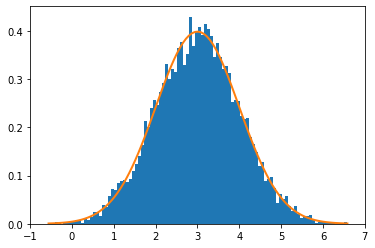

In [ ]:
import numpy as np
import math
from scipy import stats


def rejection_sampling (mu, sigma) -> list:
  # a pdf is a probability density distribution
  pdf = stats.norm(mu, sigma) 

  # set the range of the sampling space
  d_max = pdf.pdf(mu) # The maximum value of pdf of desired normal distribution

  while True:
    # desired distribution
    x = np.random.uniform(mu - 5*sigma, mu + 5*sigma , 1) [0]
    # pick a random sample from the range of sampling space
    y = np.random.uniform(0, d_max, 1)

    if y < pdf.pdf(x):
      break;
  return x

def get_samples (mu, sigma, n_samples):
  samples = []
  for i in range (n_samples) :
    sample = rejection_sampling(mu, sigma)
    samples.append(sample)
  return samples

samples = get_samples(3,1,10000)
count, bins, ignored = plt.hist (samples,100,density=True)
plt.plot(bins, stats.norm(3,1).pdf(bins), linewidth=2)
plt.xlim(-1,  7)
plt.show()



---
#### **Section B : 2D Gaussian Sampling**

> Implement sampling from a 2-dim Gaussian Distribution (2d mu, 2d sigma, sample_size)

#### **Using Rejection Sampling**

2-d Guassian Sampling using Rejection Sampling

<function matplotlib.pyplot.show>

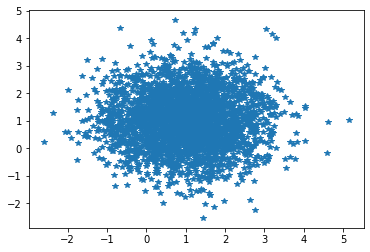

In [ ]:
from scipy.stats import multivariate_normal
import random 
import matplotlib.pyplot as plt


def sample_2d_guassian (sample_size, mu, sigma):
  array_x = []
  array_y = []
  while len(array_x) < sample_size:
    x_min = mu[0] - (5*mu[0])
    x_max = mu[0] + (5*mu[0])
    y_min = mu[1] - (5*mu[1])
    y_max = mu[1] + (5*mu[1])
    # sample x variable
    new_x = random.uniform(x_min, x_max)
    # sample y variable
    new_y = random.uniform(y_min, y_max)
    # accounts for sigma
    new_z = multivariate_normal.pdf([new_x, new_y], mu, sigma)
    sample = random.random()
    if sample < new_z:
      array_x.append(new_x)
      array_y.append(new_y)



  return array_x, array_y


array_x, array_y = sample_2d_guassian(3000, [1,1], [[1,0],[0,1]] ) 
plt.plot(array_x, array_y, '*')
plt.show


---
#### **Section C : Without Replacement Sampling**


> Implement wihtout-replacement sampling from a discrete non-uniform distribution (given as input) following the Steven's method described in class ( paper ). Test it on desired sample sizes N significantly smaller than population size M (for example N=20 M=300)

```
http://www.ccs.neu.edu/home/vip/teach/DMcourse/5_topicmodel_summ/notes_slides/sampling/Stevens.pdf
```



Steven's Method



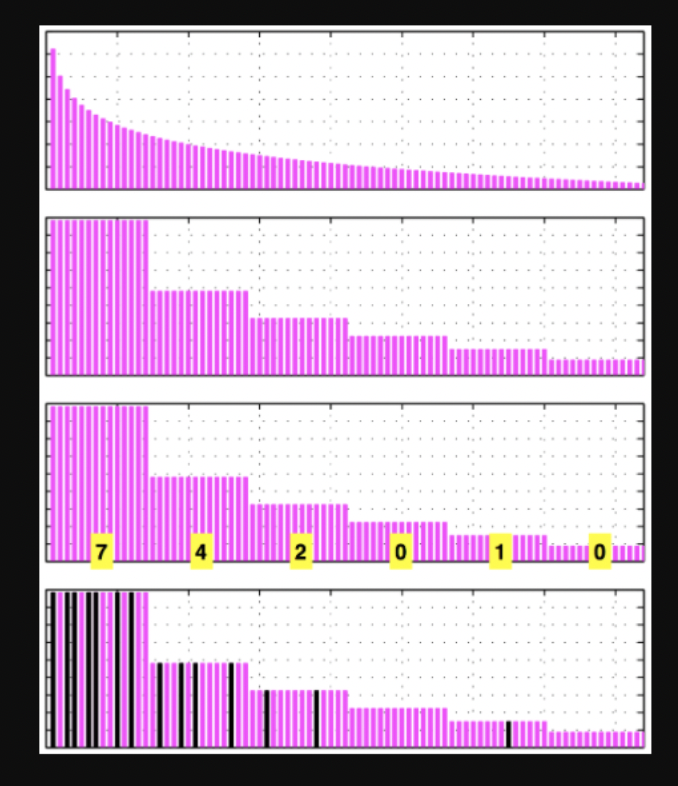

[7389, 9747, 4343, 9232, 4692, 5186, 8713, 4343, 4692, 4343, 8453, 4692, 9232, 9747, 7389, 3196, 3196, 8453, 4692, 9129, 1845, 9129, 9747, 9129, 8453, 9747, 1845, 1845, 4343, 8380, 1845, 8380, 1845, 9129, 9232, 7389, 9747, 3196, 9232, 9129, 3196, 5806, 5806, 9232, 9232, 5806, 4343, 8713, 3196, 1845, 3196, 4343, 5186, 1845, 9129, 4692, 8380, 9129, 9232, 5186, 9129, 1845, 4692, 8453, 4343, 7389, 5806, 8380, 9232, 9747, 3196, 5806, 1845, 5186, 9747, 5186, 8713, 8713, 9232, 1845, 5806, 1845, 5683, 8453, 7389, 4692, 5683, 9232, 7389, 1845, 5186, 1845, 8713, 9129, 5806, 4692, 1845, 5806, 9747, 4343, 1845, 7389, 9232, 3196, 8713, 9232, 7389, 8453, 3196, 8453, 9747, 5806, 5186, 8713, 8380, 9747, 5683, 5186, 3196, 8713, 8713, 5683, 7389, 5683, 7389, 3196, 9232, 3196, 7389, 4692, 8380, 5806, 9747, 8713, 4343, 5806, 9232, 8453, 7389, 8713, 3196, 4692, 5683, 4692, 9747, 8453, 4343, 4692, 4343, 5683, 4343, 5186, 8713, 5806, 8713, 8713, 8380, 8713, 9232, 8380, 9129, 1845, 5186, 1845, 5186, 9232, 319

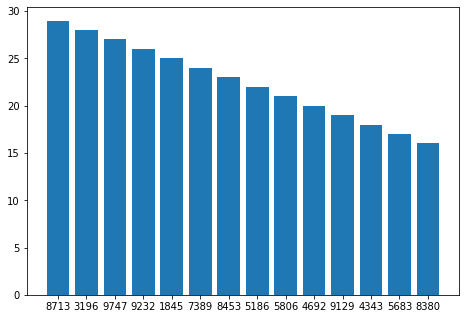

In [ ]:
from string import ascii_lowercase
import numpy as np
from random import shuffle
import math
import random


density_dict = {}
collection = [];

def create_distribution (probability) :
  while len(collection) <300 :
    probability -= 1
    token = math.floor(random.random()* 10000) 
    density_dict[token] = probability
    collection.extend([token]*(probability))
  return density_dict , collection



probability = 30
density_dict, collection = create_distribution(probability)
shuffle(collection)
print(collection)
print(len(collection))
for key, val in density_dict.items():
  print('token: ', key, '  |', 'probability: ', val)


import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
token = list(str(i) for i in density_dict.keys())
density = list(density_dict.values())
ax.bar(token,density)
plt.show()

  

In [ ]:
distance_matrix = []
for i in collection:
  row = []
  for j in collection:
    dist = abs(i-j)
    row.append(dist)
  distance_matrix.append(row)

print(distance_matrix)

[[0, 2358, 3046, 1843, 2697, 2203, 1324, 3046, 2697, 3046, 1064, 2697, 1843, 2358, 0, 4193, 4193, 1064, 2697, 1740, 5544, 1740, 2358, 1740, 1064, 2358, 5544, 5544, 3046, 991, 5544, 991, 5544, 1740, 1843, 0, 2358, 4193, 1843, 1740, 4193, 1583, 1583, 1843, 1843, 1583, 3046, 1324, 4193, 5544, 4193, 3046, 2203, 5544, 1740, 2697, 991, 1740, 1843, 2203, 1740, 5544, 2697, 1064, 3046, 0, 1583, 991, 1843, 2358, 4193, 1583, 5544, 2203, 2358, 2203, 1324, 1324, 1843, 5544, 1583, 5544, 1706, 1064, 0, 2697, 1706, 1843, 0, 5544, 2203, 5544, 1324, 1740, 1583, 2697, 5544, 1583, 2358, 3046, 5544, 0, 1843, 4193, 1324, 1843, 0, 1064, 4193, 1064, 2358, 1583, 2203, 1324, 991, 2358, 1706, 2203, 4193, 1324, 1324, 1706, 0, 1706, 0, 4193, 1843, 4193, 0, 2697, 991, 1583, 2358, 1324, 3046, 1583, 1843, 1064, 0, 1324, 4193, 2697, 1706, 2697, 2358, 1064, 3046, 2697, 3046, 1706, 3046, 2203, 1324, 1583, 1324, 1324, 991, 1324, 1843, 991, 1740, 5544, 2203, 5544, 2203, 1843, 4193, 1843, 1583, 1583, 4193, 1740, 1324, 1324

In [ ]:
import numpy as np

similarity_score = []

for dist in distance_matrix:
  avg =  np.sum(dist) / (len(dist))
  similarity_score.append(avg)

indices_by_sim = np.argsort(similarity_score)
print (indices_by_sim)
print (collection[indices_by_sim[0]])
print (collection[indices_by_sim[1]])
print (collection[indices_by_sim[2]])
print (collection[indices_by_sim[3]])





[  0 128 106 101 138  65  88  35 191  84 196 124 200  14 213 221 227 241
 245 250 282 286 289 122  71  94  97  66  80 169 131 135 153 168 189 190
 192 201 239 265 111  45 314  41  42 121 123 253  82  86 256 186 183 267
 313 280 142 116 287 149 294 242 180 195  31  29 204 114 236 130 230 156
 159 207  67 243  56 295 271 291 107 145 244 109 296 137 302  24 304 307
 182 259 178 188  17  63  10 215 258 249  83 187 235 133   6 216 139 300
 211 203 152 154 155 255 290 281 197 172 272 254 173 157 119 120  77 104
  47  92  76 113 218 151  59 268 263 162  75   5  73 274  90 193 220 202
 164 277 212 285 117 306 112  52  55   8  95 184 147  18 225 224 194 309
  11 129 252 240   4 143 141  85  62 283 198  19  60 297  39 266  93  33
 233 308 160  23  57 246 171 288  21  54 179  78   3 312 219  68 293  58
 284 229 237  38 248  44 257  43 105 185 136  34  87 102  12 167 126 165
 158   7  99 146 273 150 261 181  64 232 148  28   9 251   2  46 134 214
  51 310 305 262 298  25 110 132 292 275 276   1 11

In [ ]:

cluster_size = 20
num_clusters = (len(collection) // cluster_size) + 1

print("number of clusters :", num_clusters)
def create_clusters(cluster_size, num_clusters, indices_by_sim, collection) :
    clusters = []
    head = 0
    tail = cluster_size
    prob_marker = 0

    for i in range(num_clusters):
      cluster_avg=0
      clusters.append({ 'indices' : indices_by_sim[head:tail] })

      indices = clusters[i]['indices']
      cluster_probability = 0
      for index in indices:
        cluster_probability += collection.count(collection[index])    \
                            / len(collection)                        \
                            / len(indices)                           
      clusters[i]['prob_head'] = prob_marker
      clusters[i]['prob_tail'] = prob_marker + cluster_probability
      prob_marker = clusters[i]['prob_tail']


      if head > len(collection) :
        break;
      else: head += cluster_size
      if tail > len(collection) :
        tail = len(collection)
      else: tail += cluster_size   
    return clusters




clusters = create_clusters(cluster_size, num_clusters, indices_by_sim, collection)
for cluster in clusters :
  indices = cluster['indices']
  print (indices)
  tail = cluster['prob_tail']
  print (tail)





number of clusters : 16
[  0 128 106 101 138  65  88  35 191  84 196 124 200  14 213 221 227 241
 245 250]
0.0761904761904762
[282 286 289 122  71  94  97  66  80 169 131 135 153 168 189 190 192 201
 239 265]
0.14476190476190476
[111  45 314  41  42 121 123 253  82  86 256 186 183 267 313 280 142 116
 287 149]
0.20190476190476192
[294 242 180 195  31  29 204 114 236 130 230 156 159 207  67 243  56 295
 271 291]
0.25523809523809526
[107 145 244 109 296 137 302  24 304 307 182 259 178 188  17  63  10 215
 258 249]
0.32825396825396835
[ 83 187 235 133   6 216 139 300 211 203 152 154 155 255 290 281 197 172
 272 254]
0.4193650793650795
[173 157 119 120  77 104  47  92  76 113 218 151  59 268 263 162  75   5
  73 274]
0.5003174603174605
[ 90 193 220 202 164 277 212 285 117 306 112  52  55   8  95 184 147  18
 225 224]
0.5676190476190478
[194 309  11 129 252 240   4 143 141  85  62 283 198  19  60 297  39 266
  93  33]
0.62984126984127
[233 308 160  23  57 246 171 288  21  54 179  78   3 312

token:  8713   | probability:  29 /  315
token:  3196   | probability:  28 /  315
token:  9747   | probability:  27 /  315
token:  9232   | probability:  26 /  315
token:  1845   | probability:  25 /  315
token:  7389   | probability:  24 /  315
token:  8453   | probability:  23 /  315
token:  5186   | probability:  22 /  315
token:  5806   | probability:  21 /  315
token:  4692   | probability:  20 /  315
token:  9129   | probability:  19 /  315
token:  4343   | probability:  18 /  315
token:  5683   | probability:  17 /  315
token:  8380   | probability:  16 /  315


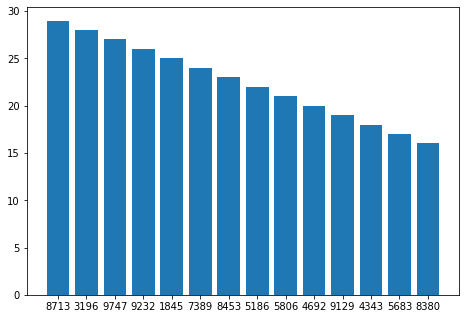

[8453, 8713, 8713, 1845, 9129, 4692, 8453, 4692, 5186, 5806, 9232, 8713, 4692, 8380, 9747, 4692, 8713, 1845, 7389, 4692, 3196, 1845, 3196, 5683, 3196, 3196, 1845, 8453, 5683, 9232, 3196, 7389, 9232, 5806, 4692, 3196, 9129, 8453, 9232, 1845, 4692, 8453, 3196, 9747, 9129, 5806, 8453, 8713, 4343, 7389]
sample token    :  4692    |  sample probability :  7 /  50
sample token    :  3196    |  sample probability :  7 /  50
sample token    :  8453    |  sample probability :  6 /  50
sample token    :  8713    |  sample probability :  5 /  50
sample token    :  1845    |  sample probability :  5 /  50
sample token    :  9232    |  sample probability :  4 /  50
sample token    :  9129    |  sample probability :  3 /  50
sample token    :  7389    |  sample probability :  3 /  50
sample token    :  5806    |  sample probability :  3 /  50
sample token    :  9747    |  sample probability :  2 /  50
sample token    :  5683    |  sample probability :  2 /  50
sample token    :  8380    |  sample pr

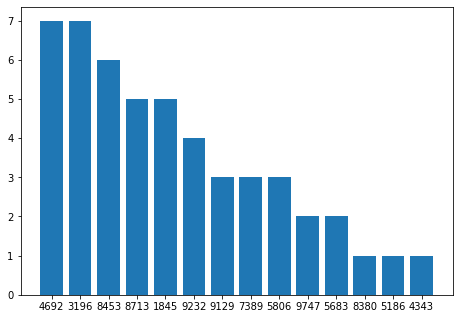

In [ ]:
sample_size =50
final_samples = []
from random import uniform
from numpy import unique

def sample_from_clusters (sample_size, clusters):
  samples = []
  for i in range(sample_size):
    sample_probability = uniform(0 , clusters[len(clusters)-1]['prob_tail'])
    for cluster in clusters:
      if  cluster['prob_head'] <  sample_probability < cluster['prob_tail'] :
       sample_index = random.choice(cluster['indices'])
    samples.append(collection[sample_index])
  return samples


for key, val in density_dict.items():
  print('token: ', key, '  |', 'probability: ', val, '/ ', len(collection))

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
token = list(str(i) for i in density_dict.keys())
density = list(density_dict.values())
ax.bar(token,density)
plt.show()

samples = sample_from_clusters(sample_size, clusters)
print(samples)


deduped = sorted(unique(samples), reverse=True)
sample_dict = {}
for item in deduped:
  sample_dict[item] = samples.count(item)


sample_dict = dict(sorted(sample_dict.items(), key=lambda item: item[1], reverse=True))

for item in sample_dict:
  print('sample token    : ', item, '   | ', 'sample probability : ', samples.count(item), '/ ', sample_size)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
token = list(str(i) for i in sample_dict.keys())
density = list(sample_dict.values())
ax.bar(token,density)
plt.show()




---
## **PROBLEM 5: Conditional Sampling**

Implement Gibbs Sampling for a multidim gaussian generative joint, by using the conditionals which are also gaussian distributions . 

```
http://www.ccs.neu.edu/home/vip/teach/DMcourse/5_topicmodel_summ/notes_slides/sampling/Marginal_cond_for_multivariate_normal.pdf
```

The minimum requirement is for joint to have D=2 variables and for Gibbs to alternate between the two.

Extra Credit: Implement your own LDA using Gibbs Sampling, following this paper
```
http://www.ccs.neu.edu/home/vip/teach/DMcourse/5_topicmodel_summ/notes_slides/sampling/darling-lda.pdf

```


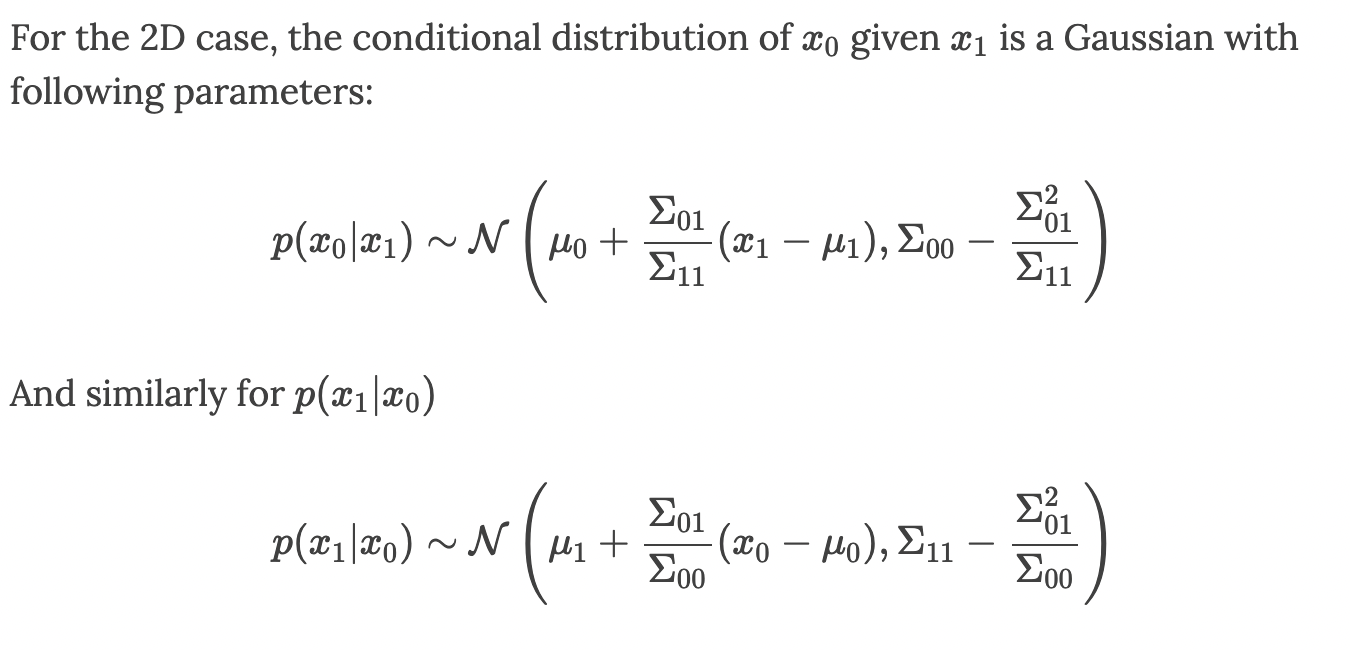

The above is referenced from https://mr-easy.github.io/2020-05-21-implementing-gibbs-sampling-in-python/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from random import random

def conditional_sampler(s_index, given_x, mean, covar):
    conditional_index = 1 - s_index
    a = covar[s_index, s_index]
    b = covar[s_index, conditional_index]
    c = covar[conditional_index, conditional_index]
    
    mu = mean[s_index] + (b * (given_x[conditional_index] - mean[conditional_index]))/c
    sigma = np.sqrt(a-(b**2)/c)
    new_x = np.copy(given_x)
    new_x[s_index] = np.random.randn()*sigma + mu
    return new_x





In [ ]:

def gibbs_sampler(first_sample, num_samples, mean, covar):
    point = np.array(first_sample)
    samples = np.empty([num_samples+1, 2])  #sampled points
    samples[0] = point
    tmp_points = np.empty([num_samples, 2]) #inbetween points

    for i in range(num_samples):

        # Sample from p(x_0|x_1)
        point = conditional_sampler(0, point, mean, covar)
        tmp_points[i] = point
            
        # Sample from p(x_1|x_0)
        point = conditional_sampler(1, point, mean, covar)
        samples[i+1] = point
    
            
        return samples, tmp_points

In [ ]:

mean = np.array([0, 0])
covar = np.array([[10, 5], 
                [4, 10]])
first_sample = [3, 1]
num_samples = 500
samples, tmp_points = gibbs_sampler(first_sample, num_samples, mean, covar)

print (samples[:10])


[[ 3.00000000e+000  1.00000000e+000]
 [-6.00000000e+000  4.00000000e+000]
 [ 1.12646967e-321  0.00000000e+000]
 [ 1.15998412e-028  2.44171989e+232]
 [ 4.94046207e-019  3.58254565e+246]
 [ 9.61496794e+270  1.49005471e+195]
 [ 7.22570948e-008  3.03181447e+180]
 [ 2.72498702e+198  2.82350049e+035]
 [ 1.97217036e+093  2.26171067e+006]
 [ 6.83044650e+015  3.76912376e+242]]
